<h1><center>Titanic Survival with KNN </center></h1>

### Loading dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

### Info:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Finding NULL values:

In [6]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Filling null values:

- Drop cabin column since it has more null values i.e 687 out of 891

In [7]:
df.drop(['Cabin'],axis=1,inplace=True)

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


- fill Embarked value with mode since it is object type

In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- i.e mode is 'S'

In [10]:
df['Embarked'].fillna('S',inplace=True)

-  fill Age column with median

In [11]:
df['Age'].fillna(df['Age'].median(),inplace=True)

### Checking Null values:

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Dropping irrelevant columns:

- since passengerid,Name,ticket has nothing do with survival rate, we can drop those columns

In [13]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Convert Text into categorical Form:

In [15]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Sex']=lab.fit_transform(df['Sex'])
df['Embarked']=lab.fit_transform(df['Embarked'])

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


<h1><center>KNN Algorithm</center></h1>

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [33]:
def prediction(n):
    x = df.drop(['Pclass'],axis=1)
    y = df['Pclass']
    k = []
    s = []
    
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors = i)
        k.append(i)
        
        print("--------------------------------------------------------------------------------------")
        print(f"Here k value is {i}: ")
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
        model = knn.fit(x_train,y_train)
        pred = model.predict(x_test)
        
        score = model.score(x_test,y_test)
        s.append(score)
    
        print(f"\nAcuuracy when k is {i} ", score)
    print("maximum score is :",np.max(s))
    plt.plot(k,s)
    plt.xlabel("K value")
    plt.ylabel("Accuracy score")
    plt.title("Graph between k value of knn and Accuracy score")
    plt.show()
    

Enter The number of iteration you want for k: 268
--------------------------------------------------------------------------------------
Here k value is 1: 

Acuuracy when k is 1  0.8544776119402985
--------------------------------------------------------------------------------------
Here k value is 2: 

Acuuracy when k is 2  0.8208955223880597
--------------------------------------------------------------------------------------
Here k value is 3: 

Acuuracy when k is 3  0.8544776119402985
--------------------------------------------------------------------------------------
Here k value is 4: 

Acuuracy when k is 4  0.8395522388059702
--------------------------------------------------------------------------------------
Here k value is 5: 

Acuuracy when k is 5  0.8507462686567164
--------------------------------------------------------------------------------------
Here k value is 6: 

Acuuracy when k is 6  0.8432835820895522
--------------------------------------------------------


Acuuracy when k is 61  0.7313432835820896
--------------------------------------------------------------------------------------
Here k value is 62: 

Acuuracy when k is 62  0.7313432835820896
--------------------------------------------------------------------------------------
Here k value is 63: 

Acuuracy when k is 63  0.7313432835820896
--------------------------------------------------------------------------------------
Here k value is 64: 

Acuuracy when k is 64  0.7164179104477612
--------------------------------------------------------------------------------------
Here k value is 65: 

Acuuracy when k is 65  0.7201492537313433
--------------------------------------------------------------------------------------
Here k value is 66: 

Acuuracy when k is 66  0.7276119402985075
--------------------------------------------------------------------------------------
Here k value is 67: 

Acuuracy when k is 67  0.7388059701492538
---------------------------------------------------


Acuuracy when k is 118  0.7238805970149254
--------------------------------------------------------------------------------------
Here k value is 119: 

Acuuracy when k is 119  0.7164179104477612
--------------------------------------------------------------------------------------
Here k value is 120: 

Acuuracy when k is 120  0.7313432835820896
--------------------------------------------------------------------------------------
Here k value is 121: 

Acuuracy when k is 121  0.7313432835820896
--------------------------------------------------------------------------------------
Here k value is 122: 

Acuuracy when k is 122  0.7350746268656716
--------------------------------------------------------------------------------------
Here k value is 123: 

Acuuracy when k is 123  0.7350746268656716
--------------------------------------------------------------------------------------
Here k value is 124: 

Acuuracy when k is 124  0.7350746268656716
--------------------------------------


Acuuracy when k is 177  0.7425373134328358
--------------------------------------------------------------------------------------
Here k value is 178: 

Acuuracy when k is 178  0.746268656716418
--------------------------------------------------------------------------------------
Here k value is 179: 

Acuuracy when k is 179  0.746268656716418
--------------------------------------------------------------------------------------
Here k value is 180: 

Acuuracy when k is 180  0.746268656716418
--------------------------------------------------------------------------------------
Here k value is 181: 

Acuuracy when k is 181  0.746268656716418
--------------------------------------------------------------------------------------
Here k value is 182: 

Acuuracy when k is 182  0.746268656716418
--------------------------------------------------------------------------------------
Here k value is 183: 

Acuuracy when k is 183  0.746268656716418
--------------------------------------------


Acuuracy when k is 234  0.7238805970149254
--------------------------------------------------------------------------------------
Here k value is 235: 

Acuuracy when k is 235  0.7238805970149254
--------------------------------------------------------------------------------------
Here k value is 236: 

Acuuracy when k is 236  0.7238805970149254
--------------------------------------------------------------------------------------
Here k value is 237: 

Acuuracy when k is 237  0.7238805970149254
--------------------------------------------------------------------------------------
Here k value is 238: 

Acuuracy when k is 238  0.7238805970149254
--------------------------------------------------------------------------------------
Here k value is 239: 

Acuuracy when k is 239  0.7238805970149254
--------------------------------------------------------------------------------------
Here k value is 240: 

Acuuracy when k is 240  0.7238805970149254
--------------------------------------

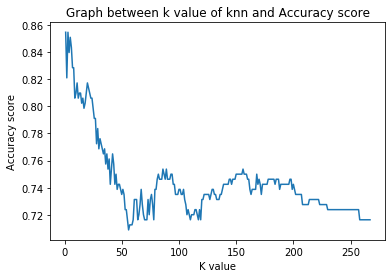

In [36]:
num = int(input('Enter The number of iteration you want for k: '))
prediction(num)

- we got maximum accuracy value at k=3 with accuracy score=85.44

### Confusion Matrix at k=3:

In [43]:
x = df.drop(['Pclass'],axis=1)
y = df['Pclass']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
k=3
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
ypred=neigh.predict(x_test)
confusion_matrix(ypred,y_test)

array([[ 55,  10,   4],
       [  3,  33,  11],
       [  2,   9, 141]], dtype=int64)